# Reading and writing data
Let's first do a bit of book keeping - figuring out how to read and write data.  The easiest way to do this is with some built in functions in numpy.

We'll start by importing our usual things:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's start by making a fake time and a fake angle array:

In [2]:
t = np.array([5, 6, 7, 8])
angle = np.array([36.0, 42.5, 44, 85])

And now we can simply save it with ```np.savetxt```:

In [3]:
np.savetxt('mytxtfile.txt', [t,angle], delimiter=',')

We can also take a gander at this file!

In [4]:
!head mytxtfile.txt

5.000000000000000000e+00,6.000000000000000000e+00,7.000000000000000000e+00,8.000000000000000000e+00
3.600000000000000000e+01,4.250000000000000000e+01,4.400000000000000000e+01,8.500000000000000000e+01


So we can see from the above that what we have is a bunch of ```float``` types where the first line is the time and the 2nd line is the angle.  We can then re-read these in:

In [5]:
data = np.genfromtxt('mytxtfile.txt', delimiter=',')
data

array([[ 5. ,  6. ,  7. ,  8. ],
       [36. , 42.5, 44. , 85. ]])

So now we have our data back in a data array.  There are a few ways to format this, we can do:

In [6]:
t_in = data[0,:]; angle_in = data[1,:]

t_in, angle_in

(array([5., 6., 7., 8.]), array([36. , 42.5, 44. , 85. ]))

We can also do this on read-in:

In [7]:
t_in = []; angle_in = []
t_in, angle_in = np.genfromtxt('mytxtfile.txt', delimiter=',')

t_in, angle_in

(array([5., 6., 7., 8.]), array([36. , 42.5, 44. , 85. ]))

Or we can actually name our array like so:

In [8]:
names = ('Time', 'Angle')
formats = ('f4', 'f4')

named_data = np.genfromtxt('mytxtfile.txt', 
                           delimiter=',', 
                           dtype={'names':names, 
                                  'formats':formats})

named_data


array([( 5.,  6. ), (36., 42.5)],
      dtype=[('Time', '<f4'), ('Angle', '<f4')])

We can then access our data like so:

In [9]:
named_data['Time']

array([ 5., 36.], dtype=float32)

However, note that our data is not properly formatted - this is because when we specify names and formats, it expects comments.  To use this feature, we should save like:

In [10]:
np.savetxt('mytxtfile.txt', np.array([t,angle]).T, delimiter=',')

!head mytxtfile.txt

5.000000000000000000e+00,3.600000000000000000e+01
6.000000000000000000e+00,4.250000000000000000e+01
7.000000000000000000e+00,4.400000000000000000e+01
8.000000000000000000e+00,8.500000000000000000e+01


What we did above is transform our list of arrays to an array of arrays, and took the transpose with ```.T``` - then things are output as columns.  So when we read in:

In [11]:
names = ('Time', 'Angle')
formats = ('f4', 'f4')

named_data = np.genfromtxt('mytxtfile.txt', 
                           delimiter=',', 
                           dtype={'names':names, 
                                  'formats':formats})

named_data

array([(5., 36. ), (6., 42.5), (7., 44. ), (8., 85. )],
      dtype=[('Time', '<f4'), ('Angle', '<f4')])

In [12]:
named_data['Time'], named_data['Angle']

(array([5., 6., 7., 8.], dtype=float32),
 array([36. , 42.5, 44. , 85. ], dtype=float32))

So this now works just fine!

# Reading in Kepler Data
Let's use what we've learned to read in some kepler datasets.  There are a bunch of parameters that we won't go through in detail, but there are more details in the header files:

In [13]:
!head -n 40 downloads/kepler101data.txt

# columns are:
# (1) Row ID from table
# (2) System Name
# (3) planet letter
# (4) Number of total planets in system
# (5) Orbital period in days
# (6) Upper error in Orbital Period (P_orb +/- (upper error)/(lower error)) in days
# (7) Lower error in orbital period in days
# (8) Semi-major axis  in AU
# (9) Error in semi major axis (a +/- ea)
# (10) Eccentricity
# (11) Upper error in eccentricity
# (12) Lower error in eccentricity
# (13) Inclination in degrees
# (14) Upper error in inclination
# (15) Lower error in inclination
# (16) Planet's mass in Jupiter mass (or M*sin(i) if given)
# (15) Upper error in planet's mass in jupiter masses
# (16) Lower error in planet's mass in jupieter masses
# (17) Mass type ('Mass' or 'Msini' - tells you what is the "mass" you actually measure)
# (18) Star's mass in solar masses
# (19) Error in star's mass
# (20) Star's radius in solar radii
# (21) Upper error in star's radius
# (22) Lower error in star's radius
# (23) Transit time in Julian days sin

In [26]:
# okay dokey, read in the file!
names = ('RowID', 'SysName', 'planetLetter', 'NumberOfPlanets', 'Porb', 
         'ePorbU', 'ePorbL',       'a',             'ea',       'ecc', 
         'eeccU',    'eeccL',    'Incl',           'eInclU',    'eInclL', 
         'pMass',   'epMassU', 'epMassL',          'pMassType', 'sMass', 
         'esMass',  'sRadius', 'esRadiusU',       'esRadiusL',  'tTime', 
         'etTimeU', 'etTimeL')
formats = ('f4',       'S12',     'S2',               'f4',        'f4',
           'f4',       'f4',      'f4',               'f4',        'f4',
           'f4',       'f4',      'f4',               'f4',        'f4',
           'f4',       'f4',      'f4',               'S8',        'f4',
           'f4',       'f4',      'f4',               'f4',        'f4', 
           'f4',       'f4')
kepler_data = np.genfromtxt('downloads/kepler11data.txt', 
                            comments='#', 
                            delimiter=',', 
                            dtype={'names':names, 
                                   'formats':formats})

kepler_data

array([(902., b'Kepler-11 ', b'b', 6.,  10.3039, 0.0006, -0.001 , 0.091, 0.001, 0.045,  6.8e-02, -4.2e-02, 89.64, 0.36, -0.18, 0.006,  4.e-03, -3.e-03, b' Mass', 0.961, 0.025, 1.065, 0.017, -0.022, 689.7378, 0.0026, -0.0047),
       (903., b'Kepler-11 ', b'c', 6.,  13.0241, 0.0013, -0.0008, 0.107, 0.001, 0.026,  6.3e-02, -1.3e-02, 89.59, 0.41, -0.16, 0.009,  9.e-03, -5.e-03, b' Mass', 0.961, 0.025, 1.065, 0.017, -0.022, 683.3494, 0.0014, -0.0019),
       (904., b'Kepler-11 ', b'd', 6.,  22.6845, 0.0009, -0.0009, 0.155, 0.001, 0.004,  7.0e-03, -2.0e-03, 89.67, 0.13, -0.16, 0.023,  3.e-03, -5.e-03, b' Mass', 0.961, 0.025, 1.065, 0.017, -0.022, 694.0069, 0.0022, -0.0014),
       (905., b'Kepler-11 ', b'e', 6.,  31.9996, 0.0008, -0.0012, 0.195, 0.002, 0.012,  6.0e-03, -6.0e-03, 88.89, 0.02, -0.02, 0.025,  5.e-03, -7.e-03, b' Mass', 0.961, 0.025, 1.065, 0.017, -0.022, 695.0755, 0.0015, -0.0009),
       (906., b'Kepler-11 ', b'f', 6.,  46.6888, 0.0027, -0.0032, 0.25 , 0.002, 0.013,  1.1e-02,

In [15]:
kepler_data['ecc']

array([0.086, 0.   ], dtype=float32)

Let's use a library to convert this.  Note: this uses a few assumptions to convert the Kepler data into initial conditions for our simulations.

Please check out the library if you want to see these assumptions

**maybe go through not sure**

In [16]:
from convert_kepler_data import convert_kepler_data

In [17]:
star_mass, \
planet_masses, \
planet_initial_position, \
planet_initial_velocity, ecc = convert_kepler_data(kepler_data)

Let's see how these things look:

In [18]:
star_mass # Msun

1.17

In [19]:
planet_masses # in Jupiter masses

array([0.16, 0.01])

In [20]:
planet_initial_position # in AU

array([[-0.0433236 ,  0.        ,  0.        ],
       [ 0.06702392,  0.01365115,  0.        ]])

In [21]:
planet_initial_velocity # in km/s

array([[   0.        , -141.87933522,    0.        ],
       [ -24.65587511,  121.05448789,    0.        ]])

### Exercise
Use the Hermite solver to model this system & plot the orbits of the planets. How large/small does your timestep have to be to be to get a stable orbit?

Once you have a stable orbit that you are happy with - save this data to a text file.  Make sure you can re-read it in and plot it!

Bonus: what about for the 5 planet system?

### Possible ans

Now import the hermite stuffs to solve this:

In [22]:
from sys import path
path.append('../lesson02/')

from hermite_library import do_hermite

In [23]:
# h is for hermite!
r_h, v_h, t_h, e_h = do_hermite(star_mass, 
                                planet_masses, 
                                planet_initial_position, 
                                planet_initial_velocity, 
                               tfinal=200, Nsteps=8800)

t_h = t_h/(365.*24*60*60)
e_h = (e_h-e_h[0])/e_h[0]

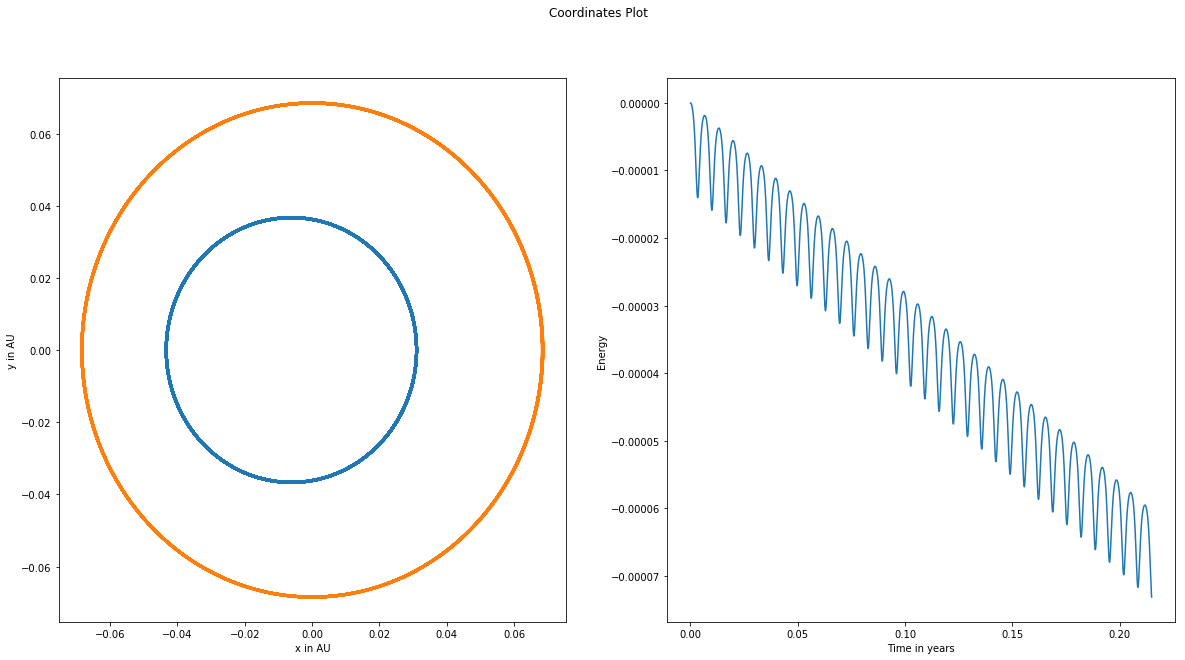

In [24]:
# let's plot!
fig, ax = plt.subplots(1, 2, figsize = (10*2, 10))
fig.suptitle('Coordinates Plot')

ax[0].set_xlabel('x in AU')
ax[0].set_ylabel('y in AU')

# plot Euler's solution, particle 1
for i in range(len(planet_masses)):
    ax[0].plot(r_h[i,0,:], r_h[i,1,:], lw=3)

ax[1].set_xlabel('Time in years')
ax[1].set_ylabel('Energy')
# re-norm energy
ax[1].plot(t_h, e_h)

plt.show()

### Exercise
Use ```select_random_ecc``` in the ```convert_kepler_data``` function to see how suseptable your "perfect" model is to changes in eccentricity.

The ```select_random_ecc``` grabs an eccentricity value between the $e \pm e_{upper},e_{lower}$

Bonus: how can you plot this uncertainty?  This is important to show the simulator the range of possible solutions.

Bonus: update the ```convert_kepler_data``` to also accept a random semi-major axis

### Possible ans

eccentricities =  [0.01906520118327093, 0.021147152428294923, 0.004452290382565378, 0.007455220078440442, 0.007995225709581815, 0.0]
eccentricities =  [0.005325656912251762, 0.06847973229853421, 0.00898194034512638, 0.008903004159758332, 0.00963650667666105, 0.0]
eccentricities =  [0.0068225371912010516, 0.07163568633021763, 0.00545833515498749, 0.011266844187845227, 0.01772216224401193, 0.0]


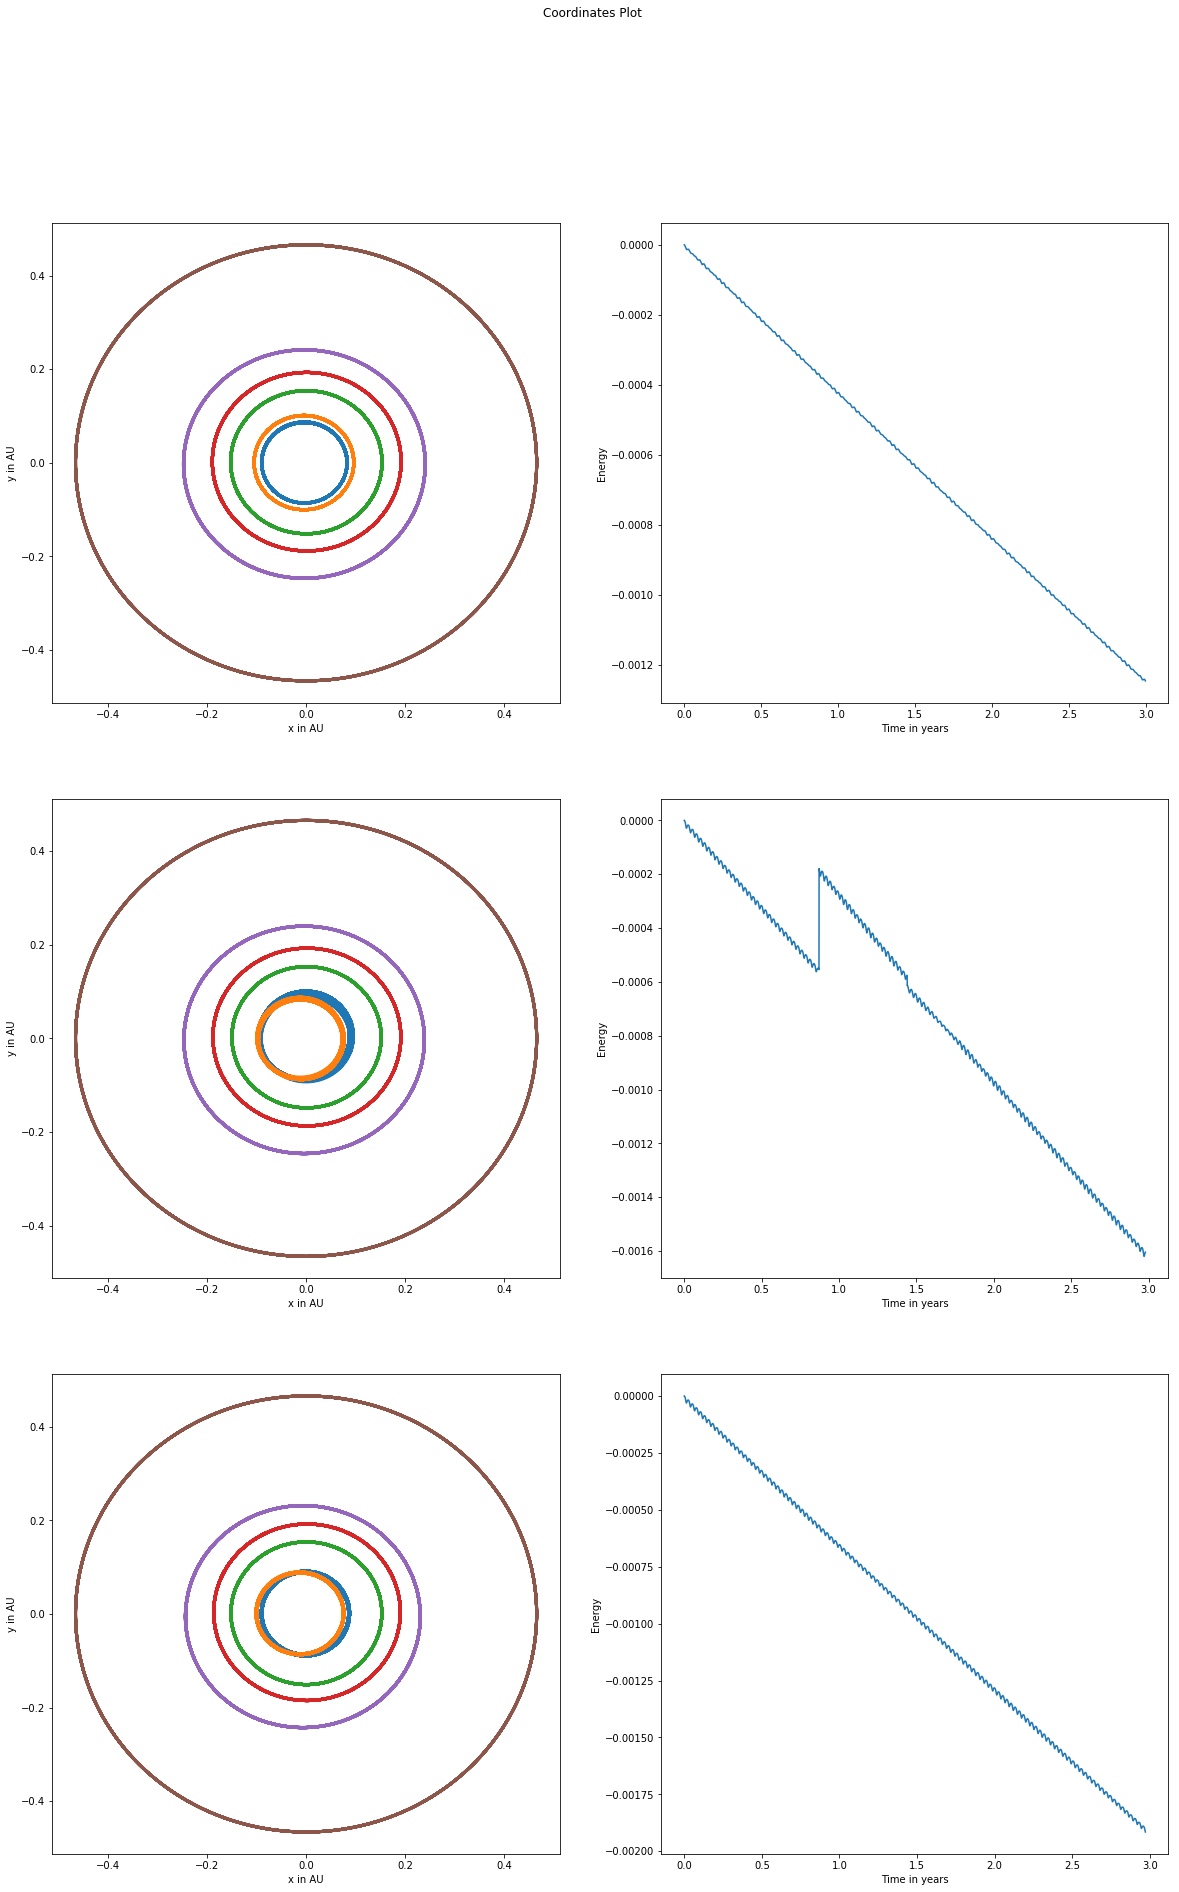

In [27]:
# h is for hermite!
n_rev = 3 # number of iterations to grab random ecc

# let's plot!
fig, ax = plt.subplots(n_rev, 2, figsize = (10*2, 10*n_rev))
fig.suptitle('Coordinates Plot')

for p in range(n_rev): 
    ax[p][0].set_xlabel('x in AU')
    ax[p][0].set_ylabel('y in AU')
    ax[p][1].set_xlabel('Time in years')
    ax[p][1].set_ylabel('Energy')

for p in range(n_rev):
    star_mass, \
    planet_masses, \
    planet_initial_position, \
    planet_initial_velocity, \
        ecc = convert_kepler_data(kepler_data, 
                                  select_random_ecc=True)
    print('eccentricities = ', ecc)

    r_h, v_h, t_h, e_h = do_hermite(star_mass, 
                                    planet_masses, 
                                    planet_initial_position, 
                                    planet_initial_velocity, 
                                    tfinal=200, Nsteps=8800)

    t_h = t_h/(365.*24*60*60)
    e_h = (e_h-e_h[0])/e_h[0]

    # plot Euler's solution, particle 1
    for i in range(len(planet_masses)):
        ax[p][0].plot(r_h[i,0,:], r_h[i,1,:], lw=3)

    # re-norm energy
    ax[p][1].plot(t_h, e_h)

plt.show()